In [28]:
# importing the libries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#load the given dataset
data=pd.read_csv(r"C:/Users/user/Downloads/ML Project - Linear Regression Insurance Prediction 16955515670.txt")

In [30]:
# first 5 rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

In [31]:
#Checking null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
#Describe dataset in statistic form
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
# data shpae
data.shape

(1338, 7)

## Checking the outliers

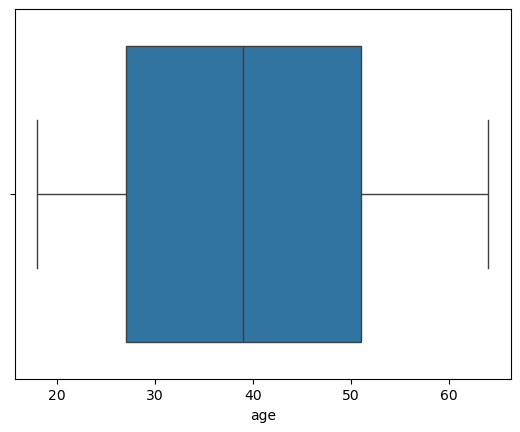

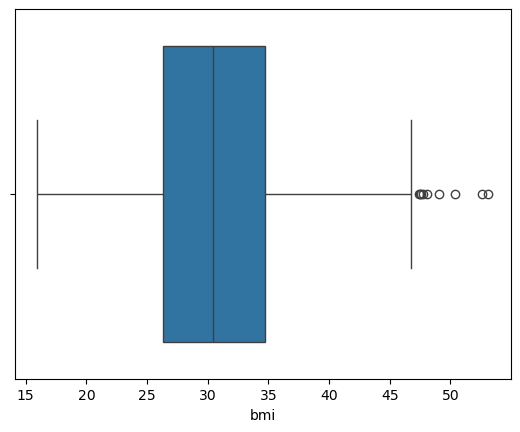

In [35]:
sns.boxplot(x="age",data=data)
plt.show()
sns.boxplot(x="bmi",data=data)
plt.show()

In [36]:
## We will remove outliers from the column bmi using z score method
z = np.abs((data["bmi"] - data["bmi"].mean()) / data["bmi"].std())
threshold = 3
data["bmi"]= data["bmi"][(z < threshold)]

## Machine Learning

In [37]:
from sklearn.preprocessing import LabelEncoder ,minmax_scale ,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score

In [38]:
#Create features and target data
x=data.drop("charges",axis=1)
y=data["charges"]

In [45]:
#Encode the data
le=LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        x[col] = le.fit_transform(x[col])
    else:
        pass

In [51]:
# Scalling the data ["age"	,"bmi" ,"charges"]
st=StandardScaler()
x=st.fit_transform(x)

In [55]:
# y=st.transform(y)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
rf=RandomForestRegressor(n_estimators=300,max_depth=8,random_state=40)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(94.51539525059111, 86.67150069047305)

In [62]:
dt=DecisionTreeRegressor(max_depth=8)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(93.28909345202506, 75.39314452591013)

In [63]:
#checking the models Scores
y_pred = rf.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2478.194543682927
20692326.104930375
0.8667150069047305


In [65]:
from xgboost import XGBRegressor ,XGBRFRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
xg.score(x_train,y_train)*100 , xg.score(x_test,y_test)*100

(99.45030732605339, 84.92903451067843)

In [66]:
xgb=XGBRFRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)*100 , xgb.score(x_test,y_test)*100

(90.20254315398256, 87.80937566135177)

In [67]:
y_pred = xg.predict(x_test)
print(r2_score(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8492903451067844
4837.094452844051
2718.2611359399634
23397482.74573469
